# ML Plus Elo

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

%matplotlib inline 

In [2]:
data_dir = '../data/'
os.listdir(data_dir)

['10-27-19-latest_odds.csv',
 '2019-10-27-latest_odds.csv',
 'historical_data.csv',
 'latest_data.csv',
 'latest_odds.csv',
 'nfl_stadiums.csv',
 'nfl_teams.csv',
 'spreadspoke_scores.csv']

In [3]:
data = pd.read_csv(data_dir + 'historical_data.csv')

In [4]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15964
team1                11
team2                11
elo1_pre             11
elo2_pre             11
elo_prob1            11
elo_prob2            11
elo1_post           160
elo2_post           160
qbelo1_pre         2322
qbelo2_pre         2322
qb1                2176
qb2                2176
qb1_value_pre      2173
qb2_value_pre      2173
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2173
qbelo_prob2        2173
qb1_game_value     2322
qb2_game_value     2322
qb1_value_post     2322
qb2_value_post     2322
qbelo1_post        2322
qbelo2_post        2322
score1              160
score2              160
dtype: int64

In [5]:
data = data[np.logical_not(data['score1'].isna())]
data = data[np.logical_not(data['score2'].isna())]

In [6]:
data.isna().sum()

date                  0
season                0
neutral               0
playoff           15815
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post             0
elo2_post             0
qbelo1_pre         2162
qbelo2_pre         2162
qb1                2162
qb2                2162
qb1_value_pre      2162
qb2_value_pre      2162
qb1_adj            2162
qb2_adj            2162
qbelo_prob1        2162
qbelo_prob2        2162
qb1_game_value     2162
qb2_game_value     2162
qb1_value_post     2162
qb2_value_post     2162
qbelo1_post        2162
qbelo2_post        2162
score1                0
score2                0
dtype: int64

In [7]:
data = data[data['season'] > 1959]

In [8]:
data = data[data['score1'] != data['score2']]

In [9]:
data.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2
2903,1960-09-09,1960,0,NaN,NE,DEN,1300.000,1300.000,0.592466,0.407534,...,0.566862,0.433138,12.540000,122.760000,1.254000,32.931770,1283.942071,1316.057929,10.0,13.0
2904,1960-09-10,1960,0,NaN,LAC,KC,1300.000,1300.000,0.592466,0.407534,...,0.589531,0.410469,316.140000,153.120000,31.614000,11.872908,1305.532159,1294.467841,21.0,20.0
2905,1960-09-11,1960,0,NaN,OAK,TEN,1300.000,1300.000,0.592466,0.407534,...,0.523584,0.476416,147.180000,238.920000,14.718000,86.530014,1270.748277,1329.251723,22.0,37.0
2906,1960-09-11,1960,0,NaN,NYJ,BUF,1300.000,1300.000,0.592466,0.407534,...,0.534573,0.465427,116.820000,-67.650000,11.682000,36.502993,1329.638852,1270.361148,27.0,3.0
2907,1960-09-16,1960,0,NaN,OAK,KC,1266.146,1294.513,0.552525,0.447475,...,0.556189,0.443811,-96.257257,185.463743,3.620474,29.231991,1237.400627,1327.815491,16.0,34.0


In [10]:
def add_elo_features(data):
    """ Based on the elo rating for the two teams, 
        create new features.  Here, elo1 is assumed
        to be the home team.
        
        The data is modified inplace.
    """
    data['elo_sum'] = data['elo1_pre'] + data['elo2_pre']
    data['elo_diff'] = data['elo1_pre'] - data['elo2_pre']
    data['elo_asym'] = data['elo_diff'] / data['elo_sum']

In [11]:
add_elo_features(data)

In [12]:
def add_targets(data):
    """ Add targets based on the game outcome. """
    
    # Did the home team win? Note, ties are removed.
    data['outcome'] = data['score1'] > data['score2']
    data['outcome'] = data['outcome'].astype(np.int)
    
    data['point_sum'] = data['score1'] + data['score2']
    data['point_diff'] = data['score1'] - data['score2']
    data['point_asym'] = data['point_diff'] / data['point_sum']

In [13]:
add_targets(data)

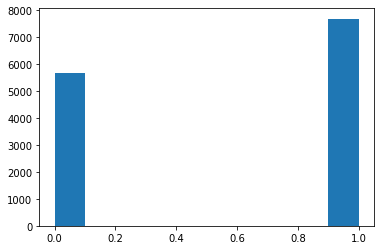

In [14]:
plt.hist(data['outcome']);

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a

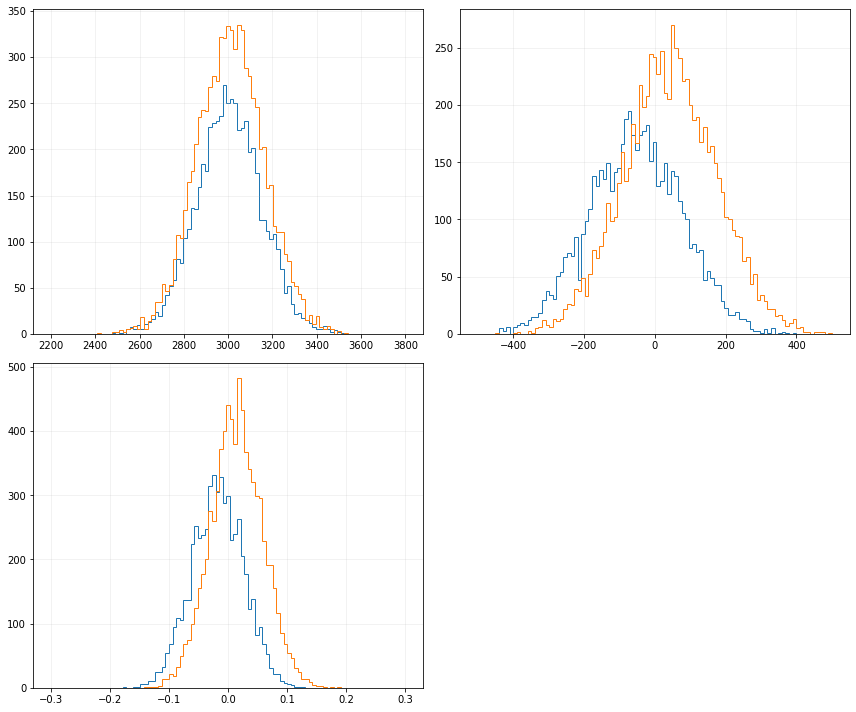

In [15]:
plt.figure(figsize=(12,10))

for outcome, subdata in data.groupby('outcome'):
    
    plt.subplot(2, 2, 1)
    plt.hist(subdata['elo_sum'], 
             bins=np.linspace(2200, 3800, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 2)
    plt.hist(subdata['elo_diff'], 
             bins=np.linspace(-500, 500, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
    plt.subplot(2, 2, 3)
    plt.hist(subdata['elo_asym'], 
             bins=np.linspace(-0.3, 0.3, 100),
             histtype='step');
    plt.grid(alpha=0.2)
    
plt.tight_layout()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
features = ['elo_sum', 'elo_diff', 'elo_asym', 'elo_prob1']
target = ['outcome']

x_train, x_test, y_train, y_test = train_test_split(data[features], data[target])

In [18]:
x_train.shape, x_test.shape

((10014, 4), (3338, 4))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

C:\Users\dmris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
model.coef_

array([[1.17966649e-04, 5.77068772e-03, 1.93097344e-06, 7.05997686e-06]])

In [22]:
y_pred = model.predict_proba(x_test)

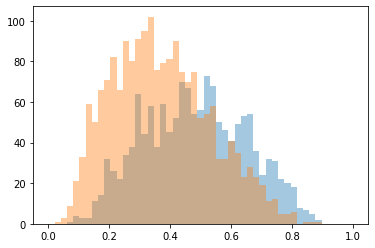

In [23]:
plt.hist(y_pred[np.where(y_test == 0)[0],0], bins=np.linspace(0,1,50), alpha=0.4);
plt.hist(y_pred[np.where(y_test == 1)[0],0], bins=np.linspace(0,1,50), alpha=0.4);

In [24]:
accuracy_score(y_test, y_pred[:,1].round())

0.6443978430197723

In [25]:
roc_auc_score(y_test, y_pred[:,1])

0.682795084561021

In [26]:
from datetime import date

In [27]:
data = pd.read_csv(data_dir + 'historical_data.csv')
add_elo_features(data)
add_targets(data)
data['date'] = pd.to_datetime(data['date'])
today = pd.Timestamp(date.today())
next_week = today + pd.Timedelta(1, unit='w')
weekly_preds = data[np.logical_and(data['date'] >= today, data['date'] < next_week)]

In [28]:
weekly_preds

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qbelo2_post,score1,score2,elo_sum,elo_diff,elo_asym,outcome,point_sum,point_diff,point_asym
16381,2019-10-27,2019,0,NaN,CHI,LAC,1554.380178,1496.171794,0.670234,0.329766,...,NaN,NaN,NaN,3050.551972,58.208384,0.019081,0,NaN,NaN,NaN
16382,2019-10-27,2019,1,NaN,LAR,CIN,1580.932601,1322.303164,0.815897,0.184103,...,NaN,NaN,NaN,2903.235765,258.629437,0.089083,0,NaN,NaN,NaN
16383,2019-10-27,2019,0,NaN,NO,ARI,1671.210236,1388.855586,0.880748,0.119252,...,NaN,NaN,NaN,3060.065822,282.354649,0.092271,0,NaN,NaN,NaN
16384,2019-10-27,2019,0,NaN,TEN,TB,1495.022260,1455.092826,0.646576,0.353424,...,NaN,NaN,NaN,2950.115086,39.929434,0.013535,0,NaN,NaN,NaN
16385,2019-10-27,2019,0,NaN,BUF,PHI,1520.440408,1529.096141,0.580382,0.419618,...,NaN,NaN,NaN,3049.536549,-8.655733,-0.002838,0,NaN,NaN,NaN
16386,2019-10-27,2019,0,NaN,ATL,SEA,1417.507260,1558.698540,0.392076,0.607924,...,NaN,NaN,NaN,2976.205799,-141.191280,-0.047440,0,NaN,NaN,NaN
16387,2019-10-27,2019,0,NaN,JAX,NYJ,1466.877760,1339.232674,0.751934,0.248066,...,NaN,NaN,NaN,2806.110434,127.645086,0.045488,0,NaN,NaN,NaN
16388,2019-10-27,2019,0,NaN,IND,DEN,1581.778479,1437.506846,0.769354,0.230646,...,NaN,NaN,NaN,3019.285325,144.271633,0.047783,0,NaN,NaN,NaN
16389,2019-10-27,2019,0,NaN,DET,NYG,1482.664454,1372.644912,0.732529,0.267471,...,NaN,NaN,NaN,2855.309366,110.019542,0.038532,0,NaN,NaN,NaN
16390,2019-10-27,2019,0,NaN,SF,CAR,1583.950620,1561.564458,0.623172,0.376828,...,NaN,NaN,NaN,3145.515077,22.386162,0.007117,0,NaN,NaN,NaN


In [29]:
weekly_preds[features]

,elo_sum,elo_diff,elo_asym,elo_prob1
16381,3050.551972,58.208384,0.019081,0.670234
16382,2903.235765,258.629437,0.089083,0.815897
16383,3060.065822,282.354649,0.092271,0.880748
16384,2950.115086,39.929434,0.013535,0.646576
16385,3049.536549,-8.655733,-0.002838,0.580382
16386,2976.205799,-141.191280,-0.047440,0.392076
16387,2806.110434,127.645086,0.045488,0.751934
16388,3019.285325,144.271633,0.047783,0.769354
16389,2855.309366,110.019542,0.038532,0.732529
16390,3145.515077,22.386162,0.007117,0.623172


In [30]:
weekly_preds['pred_proba'] = model.predict_proba(weekly_preds[features])[:,1]

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
weekly_preds[['team1', 'team2', 'elo_prob1', 'pred_proba']]

,team1,team2,elo_prob1,pred_proba
16381,CHI,LAC,0.670234,0.667249
16382,LAR,CIN,0.815897,0.862352
16383,NO,ARI,0.880748,0.879783
16384,TEN,TB,0.646576,0.640708
16385,BUF,PHI,0.580382,0.576836
16386,ATL,SEA,0.392076,0.386114
16387,JAX,NYJ,0.751934,0.744146
16388,IND,DEN,0.769354,0.766513
16389,DET,NYG,0.732529,0.725463
16390,SF,CAR,0.623172,0.622519


In [34]:
os.listdir('../data')

['10-27-19-latest_odds.csv',
 '2019-10-27-latest_odds.csv',
 'historical_data.csv',
 'latest_data.csv',
 'latest_odds.csv',
 'nfl_stadiums.csv',
 'nfl_teams.csv',
 'spreadspoke_scores.csv']

In [35]:
odds_data = pd.read_csv('../data/spreadspoke_scores.csv')

In [37]:
odds_data

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
5,09/10/1966,1966,2,False,Houston Oilers,31.0,0.0,Oakland Raiders,NaN,NaN,NaN,Rice Stadium,False,77.0,6.0,82,NaN
6,09/10/1966,1966,2,False,San Diego Chargers,24.0,0.0,New England Patriots,NaN,NaN,NaN,Balboa Stadium,False,69.0,9.0,81,NaN
7,09/11/1966,1966,1,False,Atlanta Falcons,14.0,19.0,Los Angeles Rams,NaN,NaN,NaN,Atlanta-Fulton County Stadium,False,71.0,7.0,57,NaN
8,09/11/1966,1966,2,False,Buffalo Bills,20.0,42.0,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,63.0,11.0,73,NaN
9,09/11/1966,1966,1,False,Detroit Lions,14.0,3.0,Chicago Bears,NaN,NaN,NaN,Tiger Stadium,False,67.0,7.0,73,NaN


In [38]:
odds_data = odds_data[np.logical_not(odds_data['team_favorite_id'].isna())]
odds_data = odds_data[np.logical_not(odds_data['spread_favorite'].isna())]
odds_data = odds_data[np.logical_not(odds_data['over_under_line'].isna())]

In [39]:
odds_data

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
350,01/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74,NaN
538,01/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80,NaN
727,01/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84,NaN
916,01/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60,NaN
1105,01/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40,NaN
1294,01/14/1973,1972,Superbowl,True,Miami Dolphins,14.0,7.0,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53,NaN
1483,01/13/1974,1973,Superbowl,True,Miami Dolphins,24.0,7.0,Minnesota Vikings,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81,NaN
1672,01/12/1975,1974,Superbowl,True,Minnesota Vikings,6.0,16.0,Pittsburgh Steelers,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72,NaN
1861,01/18/1976,1975,Superbowl,True,Dallas Cowboys,17.0,21.0,Pittsburgh Steelers,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44,NaN
2064,01/09/1977,1976,Superbowl,True,Minnesota Vikings,14.0,32.0,Oakland Raiders,OAK,-4.0,38,Rose Bowl,True,52.0,6.0,59,NaN


In [40]:
odds_data = odds_data[odds_data['schedule_season'] >= 1979]

In [41]:
odds_data

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87,NaN
2502,09/02/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74,NaN
2503,09/02/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68,NaN
2504,09/02/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38,NaN
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71,NaN
2506,09/02/1979,1979,1,False,Los Angeles Rams,17.0,24.0,Oakland Raiders,LAR,-4.0,36.5,Anaheim Stadium,False,70.0,10.0,77,NaN
2507,09/02/1979,1979,1,False,Minnesota Vikings,28.0,22.0,San Francisco 49ers,MIN,-7.0,32,Metropolitan Stadium,False,70.0,11.0,67,NaN
2508,09/02/1979,1979,1,False,New Orleans Saints,34.0,40.0,Atlanta Falcons,NO,-5.0,32,Louisiana Superdome,False,72.0,0.0,NaN,DOME
2509,09/02/1979,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,41,Giants Stadium,False,73.0,10.0,76,NaN
2510,09/02/1979,1979,1,False,Philadelphia Eagles,23.0,17.0,New York Giants,PHI,-7.0,31.5,Veterans Stadium,False,76.0,9.0,84,NaN


In [45]:
s1 = set(odds_data['team_home'].unique())
s2 = set(odds_data['team_away'].unique())

In [46]:
teams = s1.union(s2)

In [47]:
teams

{'Arizona Cardinals',
 'Atlanta Falcons',
 'Baltimore Colts',
 'Baltimore Ravens',
 'Buffalo Bills',
 'Carolina Panthers',
 'Chicago Bears',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Dallas Cowboys',
 'Denver Broncos',
 'Detroit Lions',
 'Green Bay Packers',
 'Houston Oilers',
 'Houston Texans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Los Angeles Chargers',
 'Los Angeles Raiders',
 'Los Angeles Rams',
 'Miami Dolphins',
 'Minnesota Vikings',
 'New England Patriots',
 'New Orleans Saints',
 'New York Giants',
 'New York Jets',
 'Oakland Raiders',
 'Philadelphia Eagles',
 'Phoenix Cardinals',
 'Pittsburgh Steelers',
 'San Diego Chargers',
 'San Francisco 49ers',
 'Seattle Seahawks',
 'St. Louis Cardinals',
 'St. Louis Rams',
 'Tampa Bay Buccaneers',
 'Tennessee Oilers',
 'Tennessee Titans',
 'Washington Redskins'}

In [48]:
team_abbreviations = {
    'Arizona Cardinals':'ARI',
    'Atlanta Falcons':'ATL',
 'Baltimore Colts':'BAL',
 'Baltimore Ravens':'BAL',
 'Buffalo Bills':'BUF',
 'Carolina Panthers':'CAR',
 'Chicago Bears':'CHI',
 'Cincinnati Bengals':'CIN',
 'Cleveland Browns':'CLE',
 'Dallas Cowboys':'DAL',
 'Denver Broncos':'DEN',
 'Detroit Lions':'DET',
 'Green Bay Packers':'GB',
 'Houston Oilers':'HOU',
 'Houston Texans':'HOU',
 'Indianapolis Colts':'IND',
 'Jacksonville Jaguars':'JAX',
 'Kansas City Chiefs':'KC',
 'Los Angeles Chargers':'LA',
 'Los Angeles Raiders':'OAK',
 'Los Angeles Rams':'LAR',
 'Miami Dolphins':'MIA',
 'Minnesota Vikings':'MIN',
 'New England Patriots':'NE',
 'New Orleans Saints':'NO',
 'New York Giants':'NYG',
 'New York Jets':'NYJ',
 'Oakland Raiders':'OAK',
 'Philadelphia Eagles':'PHI',
 'Phoenix Cardinals':'PHE',
 'Pittsburgh Steelers':'PIT',
 'San Diego Chargers':'SD',
 'San Francisco 49ers':'SF',
 'Seattle Seahawks':'SEA',
 'St. Louis Cardinals':'SL',
 'St. Louis Rams':'SL',
 'Tampa Bay Buccaneers':'TB',
 'Tennessee Oilers':'TEN',
 'Tennessee Titans':'TEN',
 'Washington Redskins':'WAS'
}

In [53]:
team_abb_rev = {v: k for (k, v) in team_abbreviations.items()}

In [57]:
odds_data['team1'] = odds_data['team_home'].apply(lambda x: team_abbreviations.get(x, 'None'))
odds_data['team2'] = odds_data['team_away'].apply(lambda x: team_abbreviations.get(x, 'None'))

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
odds_data['team1']

2501      TB
2502     BUF
2503     CHI
2504     DEN
2505      KC
2506     LAR
2507     MIN
2508      NO
2509     NYJ
2510     PHI
2511     SEA
2512      SL
2513     WAS
2514      NE
2515     DEN
2516     BAL
2517     BUF
2518     CHI
2519     DET
2520      GB
2521      KC
2522     MIA
2523      NE
2524     NYG
2525     PIT
2526      SD
2527      SF
2528     PHI
2529     ATL
2530     CIN
        ... 
12381     SF
12382    SEA
12383    OAK
12384    BAL
12385    BUF
12386    DEN
12387     GB
12388    HOU
12389     KC
12390    LAR
12391    MIN
12392     NE
12393     NO
12394    NYG
12395    PIT
12396    SEA
12397     TB
12398    TEN
12399    WAS
12400    DAL
12401    HOU
12402    BAL
12403    CHI
12404     KC
12405    LAR
12406     NE
12407     NO
12408     KC
12409     NO
12410    LAR
Name: team1, Length: 9910, dtype: object

In [60]:
odds_data['date'] = pd.to_datetime(odds_data['schedule_date'])

C:\Users\dmris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
odds_data = odds_data[['team1', 'team2', 'team_favorite_id', 'spread_favorite', 'date']]

In [72]:
df = pd.merge(left=data, right=odds_data, on=['date', 'team1', 'team2'])

In [73]:
df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,score2,elo_sum,elo_diff,elo_asym,outcome,point_sum,point_diff,point_asym,team_favorite_id,spread_favorite
0,1979-09-01,1979,0,NaN,TB,DET,1385.204000,1487.039000,0.447188,0.552812,...,16.0,2872.243000,-101.835000,-0.035455,1,47.0,15.0,0.319149,TB,-3.0
1,1979-09-02,1979,0,NaN,LAR,OAK,1571.837000,1543.108000,0.631707,0.368293,...,24.0,3114.945000,28.729000,0.009223,0,41.0,-7.0,-0.170732,LAR,-4.0
2,1979-09-02,1979,0,NaN,DEN,CIN,1579.121000,1491.380000,0.706666,0.293334,...,0.0,3070.501000,87.741000,0.028575,1,10.0,10.0,1.000000,DEN,-3.0
3,1979-09-02,1979,0,NaN,CHI,GB,1485.806000,1462.502000,0.624412,0.375588,...,3.0,2948.308000,23.304000,0.007904,1,9.0,3.0,0.333333,CHI,-3.0
4,1979-09-02,1979,0,NaN,MIN,SF,1501.070000,1376.895000,0.748189,0.251811,...,22.0,2877.965000,124.175000,0.043147,1,50.0,6.0,0.120000,MIN,-7.0
5,1979-09-02,1979,0,NaN,NYJ,CLE,1486.703000,1483.734000,0.596586,0.403414,...,25.0,2970.437000,2.969000,0.001000,0,47.0,-3.0,-0.063830,NYJ,-2.0
6,1979-09-02,1979,0,NaN,PHI,NYG,1516.285000,1435.862000,0.697859,0.302141,...,17.0,2952.147000,80.423000,0.027242,1,40.0,6.0,0.150000,PHI,-7.0
7,1979-09-02,1979,0,NaN,BUF,MIA,1422.820000,1573.513000,0.379119,0.620881,...,9.0,2996.333000,-150.693000,-0.050292,0,16.0,-2.0,-0.125000,MIA,-5.0
8,1979-09-02,1979,0,NaN,NO,ATL,1454.541000,1472.748000,0.566936,0.433064,...,40.0,2927.289000,-18.207000,-0.006220,0,74.0,-6.0,-0.081081,NO,-5.0
9,1979-09-03,1979,0,NaN,NE,PIT,1550.070000,1676.663000,0.412278,0.587722,...,16.0,3226.733000,-126.593000,-0.039233,0,29.0,-3.0,-0.103448,PIT,-2.0


In [79]:
def adjust_spread(row):
    if row['team_favorite_id'] == row['team1']:
        return row['spread_favorite']
    elif row['team_favorite_id'] == row['team2']:
        return -1 * row['spread_favorite']
    elif row['team_favorite_id'] == 'PICK':
        return 0.0
    else:
        return np.nan

In [80]:
df['adj_spread'] = df.apply(adjust_spread, axis=1)

In [82]:
df[['date', 'team1', 'team2', 'adj_spread', 'team_favorite_id', 'spread_favorite']].head(24)

,date,team1,team2,adj_spread,team_favorite_id,spread_favorite
0,1979-09-01,TB,DET,-3.0,TB,-3.0
1,1979-09-02,LAR,OAK,-4.0,LAR,-4.0
2,1979-09-02,DEN,CIN,-3.0,DEN,-3.0
3,1979-09-02,CHI,GB,-3.0,CHI,-3.0
4,1979-09-02,MIN,SF,-7.0,MIN,-7.0
5,1979-09-02,NYJ,CLE,-2.0,NYJ,-2.0
6,1979-09-02,PHI,NYG,-7.0,PHI,-7.0
7,1979-09-02,BUF,MIA,5.0,MIA,-5.0
8,1979-09-02,NO,ATL,-5.0,NO,-5.0
9,1979-09-03,NE,PIT,2.0,PIT,-2.0


In [83]:
features.extend(['adj_spread'])

In [86]:
features

['elo_sum', 'elo_diff', 'elo_asym', 'elo_prob1', 'adj_spread']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target])

In [88]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:,1]

C:\Users\dmris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dmris\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
model.coef_

array([[ 2.40933370e-05,  8.61845067e-04,  1.09701492e-05,
        -2.87988331e-04, -1.15727422e-01]])

In [91]:
accuracy_score(y_test, y_pred.round())

0.6761658031088082

In [92]:
roc_auc_score(y_test, y_pred)

0.7008430362740707

In [93]:
weekly_odds = pd.read_csv('../data/2019-10-27-latest_odds.csv')

In [94]:
weekly_odds

,home_team,away_team,spread,date,id_code
0,lions,giants,-7.5,10-27-19,BT
1,lions,giants,-6.5,10-27-19,BT
2,lions,giants,-6.0,10-27-19,J
3,lions,giants,NaN,10-27-19,N
4,lions,giants,-6.5,10-27-19,CS
5,lions,giants,-6.5,10-27-19,L
6,lions,giants,-6.0,10-27-19,BQ
7,lions,giants,-6.0,10-27-19,CQ
8,lions,giants,-6.5,10-27-19,X
9,bears,chargers,-5.5,10-27-19,BT


In [96]:
weekly_odds['id_code'].unique()

array(['BT', 'J', 'N', 'CS', 'L', 'BQ', 'CQ', 'X', 'H', 'CL', 'CA', 'P',
       'BO', 'CG', 'E', 'AA'], dtype=object)

In [99]:
def nan_mean(x):
    return x[np.logical_not(x.isna())].mean()

In [100]:
weekly_odds.groupby(['home_team', 'away_team', 'date']).agg({
    'spread':nan_mean}
)

,,,spread
home_team,away_team,date,
bears,chargers,10-27-19,-3.647059
bills,redskins,11-03-19,-10.000000
broncos,browns,11-03-19,-1.250000
cardinals,49ers,10-31-19,-6.750000
chiefs,packers,10-27-19,-4.900000
colts,broncos,10-27-19,-5.794118
dolphins,jets,11-03-19,-6.000000
eagles,bears,11-03-19,-3.000000
jaguars,jets,10-27-19,-6.794118


In [102]:
weekly_odds['home_team'].unique()

array(['lions', 'bears', 'jaguars', 'rams', 'texans', 'colts', 'chiefs',
       'cardinals', 'bills', 'eagles', 'dolphins', 'raiders', 'broncos',
       'ravens'], dtype=object)

In [103]:
weekly_odds['away_team'].unique()

array(['giants', 'chargers', 'jets', 'bengals', 'raiders', 'broncos',
       'packers', '49ers', 'redskins', 'bears', 'lions', 'browns',
       'patriots'], dtype=object)

In [107]:
team_abb2 = {
    'lions':'DET',
    'bears':'CHI',
    'jaguars':'JAX',
    'rams':'LA',
    'texans':'HOU',
    'colts':'IND',
    'chiefs':'KC',
    'cardinals':'ARI',
    'bills':'BUF',
    'eagles':'PHI',
    'dolphins':'MIA',
    'raiders':'OAK',
    'broncos':'DEN',
    'ravens':'BAL',
    'giants':'NYG',
    'chargers':'SD',
    'jets':'NYG',
    'bengals':'CIN',
    'packers':'GB',
    '49ers':'SF',
    'redskins':'WAS',
    'browns':'CLE',
    'patriots':'NE'
}

In [108]:
weekly_odds['team1'] = weekly_odds['home_team'].apply(lambda x: team_abb2.get(x, 'None'))
weekly_odds['team2'] = weekly_odds['away_team'].apply(lambda x: team_abb2.get(x, 'None'))

In [113]:
weekly_odds_clean = weekly_odds.groupby(['date', 'team1', 'team2']).agg(
    {'spread':nan_mean}
).reset_index()

In [119]:
weekly_odds_clean['date'] = pd.to_datetime(weekly_odds_clean['date'])

In [121]:
weekly_odds_clean

,date,team1,team2,spread
0,2019-10-27,CHI,SD,-3.647059
1,2019-10-27,DET,NYG,-6.400000
2,2019-10-27,HOU,OAK,-6.277778
3,2019-10-27,IND,DEN,-5.794118
4,2019-10-27,JAX,NYG,-6.794118
5,2019-10-27,KC,GB,-4.900000
6,2019-10-27,LA,CIN,-11.529412
7,2019-10-31,ARI,SF,-6.750000
8,2019-11-03,BAL,NE,-5.500000
9,2019-11-03,BUF,WAS,-10.000000


In [122]:
weekly_preds

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,score1,score2,elo_sum,elo_diff,elo_asym,outcome,point_sum,point_diff,point_asym,pred_proba
16381,2019-10-27,2019,0,NaN,CHI,LAC,1554.380178,1496.171794,0.670234,0.329766,...,NaN,NaN,3050.551972,58.208384,0.019081,0,NaN,NaN,NaN,0.667249
16382,2019-10-27,2019,1,NaN,LAR,CIN,1580.932601,1322.303164,0.815897,0.184103,...,NaN,NaN,2903.235765,258.629437,0.089083,0,NaN,NaN,NaN,0.862352
16383,2019-10-27,2019,0,NaN,NO,ARI,1671.210236,1388.855586,0.880748,0.119252,...,NaN,NaN,3060.065822,282.354649,0.092271,0,NaN,NaN,NaN,0.879783
16384,2019-10-27,2019,0,NaN,TEN,TB,1495.022260,1455.092826,0.646576,0.353424,...,NaN,NaN,2950.115086,39.929434,0.013535,0,NaN,NaN,NaN,0.640708
16385,2019-10-27,2019,0,NaN,BUF,PHI,1520.440408,1529.096141,0.580382,0.419618,...,NaN,NaN,3049.536549,-8.655733,-0.002838,0,NaN,NaN,NaN,0.576836
16386,2019-10-27,2019,0,NaN,ATL,SEA,1417.507260,1558.698540,0.392076,0.607924,...,NaN,NaN,2976.205799,-141.191280,-0.047440,0,NaN,NaN,NaN,0.386114
16387,2019-10-27,2019,0,NaN,JAX,NYJ,1466.877760,1339.232674,0.751934,0.248066,...,NaN,NaN,2806.110434,127.645086,0.045488,0,NaN,NaN,NaN,0.744146
16388,2019-10-27,2019,0,NaN,IND,DEN,1581.778479,1437.506846,0.769354,0.230646,...,NaN,NaN,3019.285325,144.271633,0.047783,0,NaN,NaN,NaN,0.766513
16389,2019-10-27,2019,0,NaN,DET,NYG,1482.664454,1372.644912,0.732529,0.267471,...,NaN,NaN,2855.309366,110.019542,0.038532,0,NaN,NaN,NaN,0.725463
16390,2019-10-27,2019,0,NaN,SF,CAR,1583.950620,1561.564458,0.623172,0.376828,...,NaN,NaN,3145.515077,22.386162,0.007117,0,NaN,NaN,NaN,0.622519


In [126]:
merged_pred_data = pd.merge(left=weekly_preds, right=weekly_odds_clean, on=['date', 'team1', 'team2'], how='left')

In [127]:
merged_pred_data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,score2,elo_sum,elo_diff,elo_asym,outcome,point_sum,point_diff,point_asym,pred_proba,spread
0,2019-10-27,2019,0,NaN,CHI,LAC,1554.380178,1496.171794,0.670234,0.329766,...,NaN,3050.551972,58.208384,0.019081,0,NaN,NaN,NaN,0.667249,NaN
1,2019-10-27,2019,1,NaN,LAR,CIN,1580.932601,1322.303164,0.815897,0.184103,...,NaN,2903.235765,258.629437,0.089083,0,NaN,NaN,NaN,0.862352,NaN
2,2019-10-27,2019,0,NaN,NO,ARI,1671.210236,1388.855586,0.880748,0.119252,...,NaN,3060.065822,282.354649,0.092271,0,NaN,NaN,NaN,0.879783,NaN
3,2019-10-27,2019,0,NaN,TEN,TB,1495.022260,1455.092826,0.646576,0.353424,...,NaN,2950.115086,39.929434,0.013535,0,NaN,NaN,NaN,0.640708,NaN
4,2019-10-27,2019,0,NaN,BUF,PHI,1520.440408,1529.096141,0.580382,0.419618,...,NaN,3049.536549,-8.655733,-0.002838,0,NaN,NaN,NaN,0.576836,NaN
5,2019-10-27,2019,0,NaN,ATL,SEA,1417.507260,1558.698540,0.392076,0.607924,...,NaN,2976.205799,-141.191280,-0.047440,0,NaN,NaN,NaN,0.386114,NaN
6,2019-10-27,2019,0,NaN,JAX,NYJ,1466.877760,1339.232674,0.751934,0.248066,...,NaN,2806.110434,127.645086,0.045488,0,NaN,NaN,NaN,0.744146,NaN
7,2019-10-27,2019,0,NaN,IND,DEN,1581.778479,1437.506846,0.769354,0.230646,...,NaN,3019.285325,144.271633,0.047783,0,NaN,NaN,NaN,0.766513,-5.794118
8,2019-10-27,2019,0,NaN,DET,NYG,1482.664454,1372.644912,0.732529,0.267471,...,NaN,2855.309366,110.019542,0.038532,0,NaN,NaN,NaN,0.725463,-6.400000
9,2019-10-27,2019,0,NaN,SF,CAR,1583.950620,1561.564458,0.623172,0.376828,...,NaN,3145.515077,22.386162,0.007117,0,NaN,NaN,NaN,0.622519,NaN
